<a href="https://colab.research.google.com/github/combechelsey/Full-Scale-Waste-Water-Treatment-Plant-Data-Analysis/blob/main/Full_Scale_Waste_Water_Treatment_Plant_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Full Scale Waste Water Treatment Plant Data Analysis**

**Data originally sourced from a wastewater treatment plant in Melbourne, Australia.  Atmospheric data compiled by Melbourne weather stations.**

**Original Data link**  https://www.kaggle.com/datasets/d4rklucif3r/full-scale-waste-water-treatment-plant-data

## Data Dictionary
  Average Outflow (avg_outflow)
  
  Average Inflow (avg_inflow)
  
  Energy Consumption (total_grid)
  
  Ammonia	(A)
  
  Biological Oxygen Demand (BOD)
  
  Chemical Oxygen Demand (COD)
  
  Total Nitrogen (TN)
  
  Average Temperature	(T)
  
  Maximum temperature	(TM)
  
  Minimum temperature	(Tm)
  
  Atmospheric pressure (SLP)
  
  Average humidity	(H)
  
  Total rainfall	(PP)
  
  Average visibility (VV)
  
  Average wind speed	(VW)
  
  Maximum wind speed	(VG)
  
  Year	(year)
  
  Month	(month)
  
  Day (day)





https://www.sciencedirect.com/science/article/abs/pii/S0957582021004663?via%3Dihub

In [9]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and Inspect Data

In [11]:
#Loading dataset
file_path = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/Data-Melbourne_F.csv"
df = pd.read_csv(file_path)
df.head(30)

,avg_outflow,avg_inflow,total_grid,Am,BOD,COD,TN,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,year,month,day
0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,79.5,2014,1,1
1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,0.0,2014,1,2
2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,77.8,2014,1,5
3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,53.5,2014,1,6
4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,53.5,2014,1,7
5,2.912,3.750,247691,40.0,410.0,820.0,61.786,18.9,27.3,7.7,0.0,52,0.00,0.0,15.6,31.7,0.0,2014,1,8
6,2.355,3.507,224706,51.0,555.0,1110.0,68.820,25.9,32.4,12.1,0.0,39,0.00,0.0,26.7,46.5,59.4,2014,1,9
7,2.366,3.188,212440,41.0,365.0,730.0,62.218,17.7,24.6,13.0,0.0,69,0.00,9.8,13.1,25.9,0.0,2014,1,12
8,3.923,3.378,202676,26.0,355.0,710.0,61.433,26.4,36.0,12.7,0.0,44,0.00,0.0,19.8,51.9,64.8,2014,1,13
9,3.912,3.425,202411,42.0,530.0,830.0,66.354,35.5,43.5,28.5,0.0,20,0.00,0.0,27.8,57.6,72.2,2014,1,14


In [ ]:
#Saving original dataset as 'df2'
df2 = df.copy()

In [ ]:
#Viewing info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   avg_outflow  1382 non-null   float64
 1   avg_inflow   1382 non-null   float64
 2   total_grid   1382 non-null   int64  
 3   Am           1382 non-null   float64
 4   BOD          1382 non-null   float64
 5   COD          1382 non-null   float64
 6   TN           1382 non-null   float64
 7   T            1382 non-null   float64
 8   TM           1382 non-null   float64
 9   Tm           1382 non-null   float64
 10  SLP          1382 non-null   float64
 11  H            1382 non-null   int64  
 12  PP           1382 non-null   float64
 13  VV           1382 non-null   float64
 14  V            1382 non-null   float64
 15  VM           1382 non-null   float64
 16  VG           1382 non-null   float64
 17  year         1382 non-null   int64  
 18  month        1382 non-null   int64  
 19  day   

In [12]:
#View descriptive statistics for numerical colums
df.describe()

,avg_outflow,avg_inflow,total_grid,Am,BOD,COD,TN,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,year,month,day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,29.184009,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,31.366315,1.583491,3.410588,8.741422
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,0.000000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,0.000000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,57.600000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,107.600000,2019.000000,12.000000,31.000000


In [13]:
#Viewing quantity of rows and columns within dataframe
df.shape

(1382, 20)

- There are 1382 rows and 20 columns.

##Clean Data

Checking the data types:

In [14]:
#Viewing data types within dataframe
df.dtypes

avg_outflow    float64
avg_inflow     float64
total_grid       int64
Am             float64
BOD            float64
COD            float64
TN             float64
T              float64
TM             float64
Tm             float64
SLP            float64
H                int64
PP             float64
VV             float64
V              float64
VM             float64
VG             float64
year             int64
month            int64
day              int64
dtype: object

- All datatypes are numeric.

###Duplicated Data

In [15]:
#Checking for duplicate rows within dataset
df.duplicated().sum()

0

- There are no duplicated rows in this dataset




###Missing Values

In [16]:
#Viewing null values
df.isna().sum()

avg_outflow    0
avg_inflow     0
total_grid     0
Am             0
BOD            0
COD            0
TN             0
T              0
TM             0
Tm             0
SLP            0
H              0
PP             0
VV             0
V              0
VM             0
VG             0
year           0
month          0
day            0
dtype: int64

Identifying % of missing data:

In [17]:
#Viewing null values as a percentage of total column values
df.isna().sum() / len(df) * 100

avg_outflow    0.0
avg_inflow     0.0
total_grid     0.0
Am             0.0
BOD            0.0
COD            0.0
TN             0.0
T              0.0
TM             0.0
Tm             0.0
SLP            0.0
H              0.0
PP             0.0
VV             0.0
V              0.0
VM             0.0
VG             0.0
year           0.0
month          0.0
day            0.0
dtype: float64

- There are no missing values in this dataset.

##Exploratory Data Analysis

###EDA Functions

In [35]:
#add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  #make a copy of df
  temp_df = df.copy()
  # Calculate percent of null values for printing
  null_count = temp_df[x].isna().sum()
  null_percent = null_count/len(temp_df)*100

  # Make figure with gridspec for subplots
  gridspec = {"height_ratios":[0.7, 0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                          sharex= True, gridspec_kw = gridspec)
  # Histogram on top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  # Adding title
  axes[0].set_title(f"Column: {x}", fontweight="bold")

  # Adjusting subplots
  fig.tight_layout()

  # Display plot before message
  plt.show()

  # Print null value info
  print(f" - NaN's Found: {null_count} ({round(null_percent, 2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # Get the most common values as number and percent
  most_common_value_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_value_count.index[0]
  freq = most_common_value_count.values[0]
  perc_most_common = freq / len(df) *100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common, 2)}%)")

 # Print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n-[!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print(f"- Not constant or quasi-constant.")
  return fig, ax

In [36]:
'''Multivariate Plotting functions vs Numeric Target'''

def plot_categorical_vs_target(df, x, y="avg_output", figsize=(6,4),
                               fillna=True, placeholder= "Missing",
                               order = None):
  # Make a copy of df
  temp_df = df.copy()

  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls
  else:
    temp_df = temp_df.dropna(subset=[x])

  # Create figures
  fig, ax = plt.subplots(figsize=figsize)

  # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order= order, alpha=0.6,
              linewidth= 1, edgecolor="black", errorbar = None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, order= order,
                hue_order= order, legend=False,
                size=3, zorder=0)
  # Rotate x labels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

  # Add title
  ax.set_title(f"{x} vs. {y}", fontweight="bold")
  fig.tight_layout()
  return fig, ax

def plot_numeric_vs_target(df, x, y="Item_Outlet_Sales",
                           figsize=(6,4),
                           ):
  # Calculate correlation
  corr= df[[x,y]].corr().round(2)
  r= corr.loc[x,y]

  # Plot data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws = {"ec":"white", "lw": 1, "alpha":0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws = scatter_kws)

  #Add title with correlation
  ax.set_title(f"{x} vs. {y} (r= {r})", fontweight = "bold")

  # Show plot before print statement
  plt.show()

  return fig, ax

###Statistical distribution of numerical columns

In [18]:
# Using select dtypes to get names of numerical columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['avg_outflow', 'avg_inflow', 'total_grid', 'Am', 'BOD', 'COD', 'TN',
       'T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'VG', 'year',
       'month', 'day'],
      dtype='object')

####Average Outflow

In [37]:
# Confirming the dtype to select correct EDA function
feature = "avg_outflow"
df[feature].dtype

dtype('float64')

In [30]:
#Descriptive statistics for Item MRP
df["avg_outflow"].describe()

count    1382.000000
mean        3.930608
std         1.228778
min         0.000004
25%         3.074500
50%         3.701000
75%         4.498750
max         7.920000
Name: avg_outflow, dtype: float64

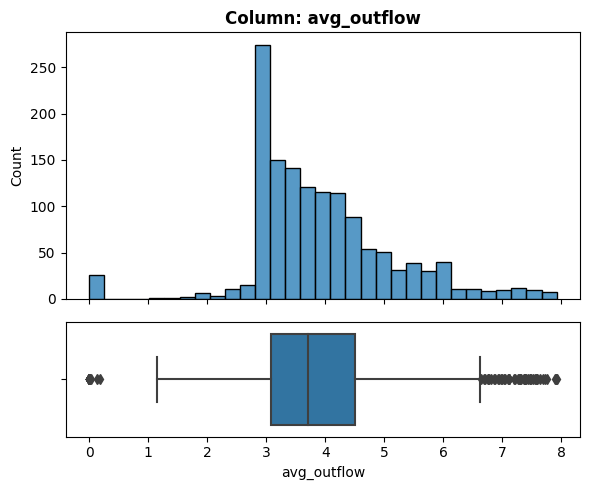

 - NaN's Found: 0 (0.0%)
- Unique Values: 1052
- Most common value: '4.347826086956525e-06' occurs 22 times (1.59%)
- Not constant or quasi-constant.


In [38]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

- Minimum outflow average: 0.000004
- Maximum outflow average: 7.920000
- Mean outflow average: 3.930608
- We have some outliers for Average Outflow on both the low and high ends in this dataset.

####Average Inflow

In [29]:
#Descriptive statistics for Item MRP
df["avg_inflow"].describe()

count    1382.000000
mean        4.506338
std         1.439583
min         2.589000
25%         3.643250
50%         4.161500
75%         4.847750
max        18.968000
Name: avg_inflow, dtype: float64

In [40]:
# Confirming the dtype to select correct EDA function
feature = "avg_inflow"
df[feature].dtype

dtype('float64')

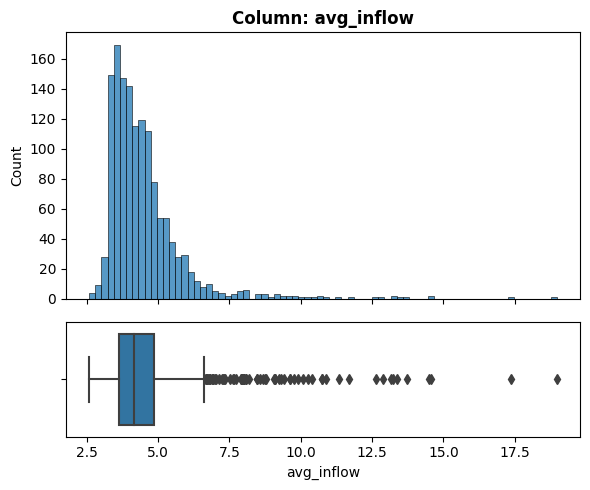

 - NaN's Found: 0 (0.0%)
- Unique Values: 1093
- Most common value: '3.837' occurs 4 times (0.29%)
- Not constant or quasi-constant.


In [41]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

- Minimum inflow average: 2.589
- Maximum inflow average: 18.968
- Mean inflow average: 4.506
- We have many outliers at the high end in this dataset.

####Energy Consumption

In [42]:
#Descriptive statistics for Item MRP
df["total_grid"].describe()

count      1382.000000
mean     275159.089001
std       44640.533689
min      116638.000000
25%      246435.750000
50%      275808.000000
75%      305703.750000
max      398328.000000
Name: total_grid, dtype: float64

In [43]:
# Confirming the dtype to select correct EDA function
feature = "total_grid"
df[feature].dtype

dtype('int64')

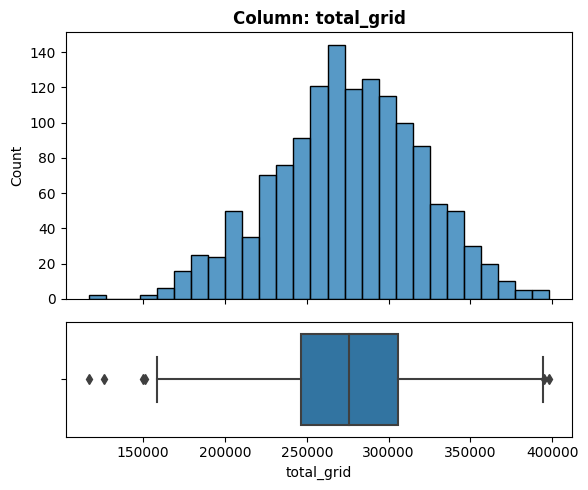

 - NaN's Found: 0 (0.0%)
- Unique Values: 1379
- Most common value: '250282' occurs 2 times (0.14%)
- Not constant or quasi-constant.


In [44]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Ammonia

In [45]:
#Descriptive statistics for Item MRP
df["Am"].describe()

count    1382.000000
mean       39.222302
std         7.761598
min        13.000000
25%        34.000000
50%        39.000000
75%        44.000000
max        93.000000
Name: Am, dtype: float64

In [46]:
# Confirming the dtype to select correct EDA function
feature = "Am"
df[feature].dtype

dtype('float64')

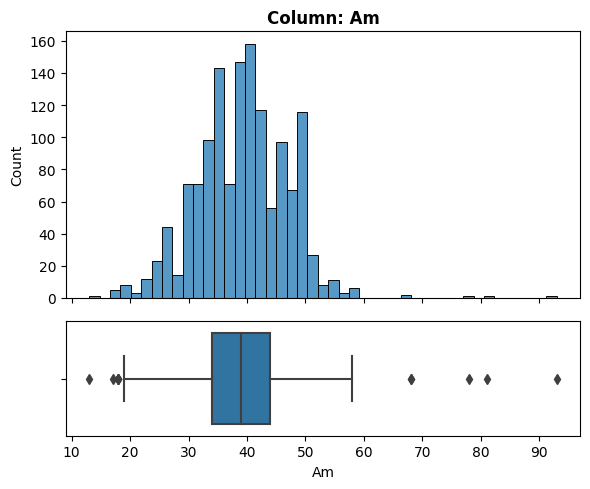

 - NaN's Found: 0 (0.0%)
- Unique Values: 48
- Most common value: '40.0' occurs 90 times (6.51%)
- Not constant or quasi-constant.


In [47]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Biological Oxygen Demand

In [48]:
#Descriptive statistics for Item MRP
df["BOD"].describe()

count    1382.000000
mean      382.061708
std        85.996012
min       140.000000
25%       330.000000
50%       360.000000
75%       422.980000
max       850.000000
Name: BOD, dtype: float64

In [49]:
# Confirming the dtype to select correct EDA function
feature = "BOD"
df[feature].dtype

dtype('float64')

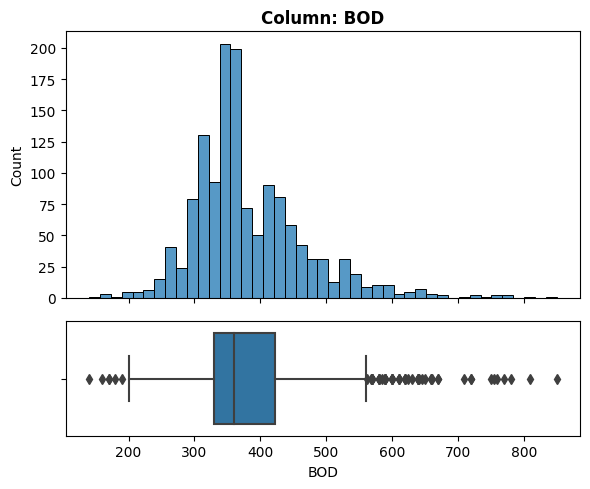

 - NaN's Found: 0 (0.0%)
- Unique Values: 214
- Most common value: '340.0' occurs 97 times (7.02%)
- Not constant or quasi-constant.


In [50]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Chemical Oxygen Demand

In [51]:
#Descriptive statistics for Item MRP
df["COD"].describe()

count    1382.000000
mean      845.960434
std       145.416540
min       360.000000
25%       751.250000
50%       845.000000
75%       920.000000
max      1700.000000
Name: COD, dtype: float64

In [52]:
# Confirming the dtype to select correct EDA function
feature = "COD"
df[feature].dtype

dtype('float64')

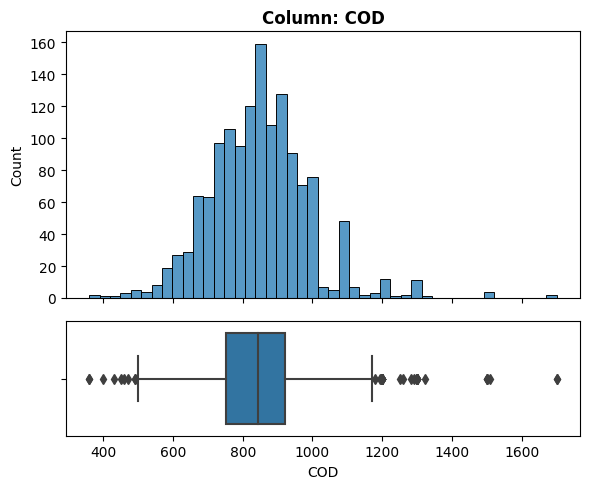

 - NaN's Found: 0 (0.0%)
- Unique Values: 221
- Most common value: '1000.0' occurs 52 times (3.76%)
- Not constant or quasi-constant.


In [53]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Total Nitrogen

In [54]:
#Descriptive statistics for Item MRP
df["TN"].describe()

count    1382.000000
mean       62.740752
std         3.571035
min        40.000000
25%        61.396000
50%        62.957500
75%        64.366000
max        92.000000
Name: TN, dtype: float64

In [55]:
# Confirming the dtype to select correct EDA function
feature = "TN"
df[feature].dtype

dtype('float64')

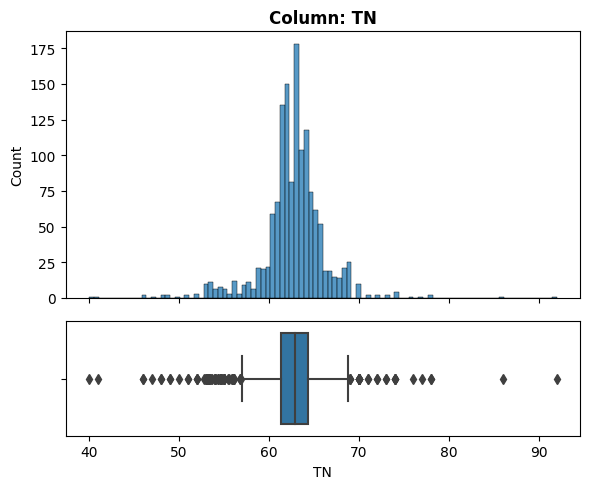

 - NaN's Found: 0 (0.0%)
- Unique Values: 355
- Most common value: '63.312' occurs 36 times (2.6%)
- Not constant or quasi-constant.


In [56]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Average Temperature

In [57]:
#Descriptive statistics for Item MRP
df["T"].describe()

count    1382.000000
mean       15.036686
std         5.398491
min         0.000000
25%        10.800000
50%        14.300000
75%        18.575000
max        35.500000
Name: T, dtype: float64

In [58]:
# Confirming the dtype to select correct EDA function
feature = "T"
df[feature].dtype

dtype('float64')

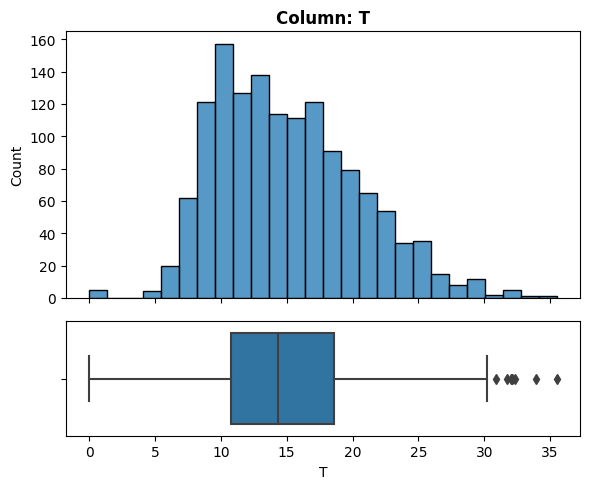

 - NaN's Found: 0 (0.0%)
- Unique Values: 230
- Most common value: '11.3' occurs 20 times (1.45%)
- Not constant or quasi-constant.


In [59]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Maximum Temperature

In [60]:
#Descriptive statistics for Item MRP
df["TM"].describe()

count    1382.000000
mean       20.530897
std         7.096760
min         0.000000
25%        15.000000
50%        19.200000
75%        25.200000
max        43.500000
Name: TM, dtype: float64

In [61]:
# Confirming the dtype to select correct EDA function
feature = "TM"
df[feature].dtype

dtype('float64')

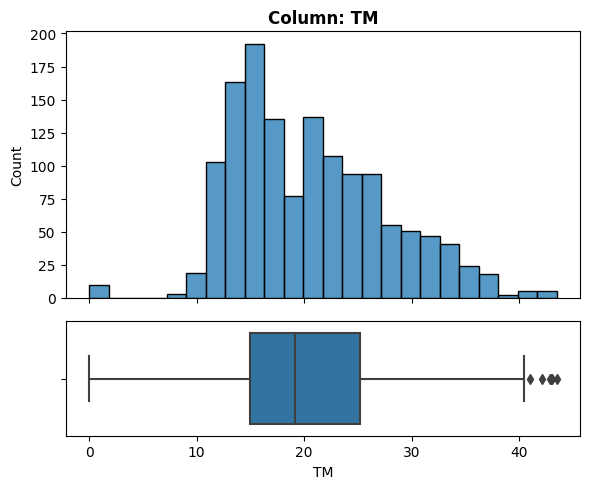

 - NaN's Found: 0 (0.0%)
- Unique Values: 195
- Most common value: '15.0' occurs 76 times (5.5%)
- Not constant or quasi-constant.


In [62]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Minimum Temperature

In [63]:
#Descriptive statistics for Item MRP
df["Tm"].describe()

count    1382.000000
mean       10.037337
std         4.656887
min        -2.000000
25%         6.800000
50%         9.600000
75%        13.000000
max        28.500000
Name: Tm, dtype: float64

In [64]:
# Confirming the dtype to select correct EDA function
feature = "Tm"
df[feature].dtype

dtype('float64')

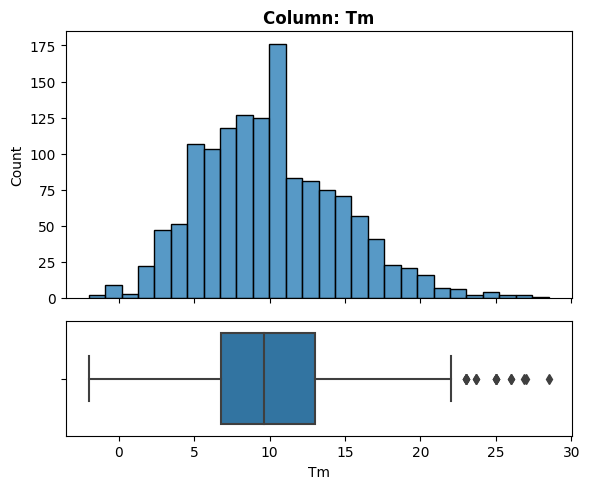

 - NaN's Found: 0 (0.0%)
- Unique Values: 162
- Most common value: '9.0' occurs 82 times (5.93%)
- Not constant or quasi-constant.


In [65]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Atmospheric Pressure

In [67]:
#Descriptive statistics for Item MRP
df["SLP"].describe()

count    1382.000000
mean        3.675036
std        61.010416
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1022.000000
Name: SLP, dtype: float64

In [68]:
# Confirming the dtype to select correct EDA function
feature = "SLP"
df[feature].dtype

dtype('float64')

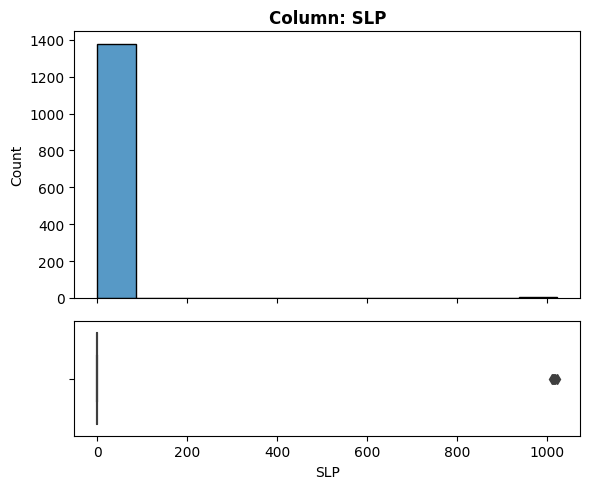

 - NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: '0.0' occurs 1377 times (99.64%)

-[!] Warning: 'SLP' is a constant or quasi-constant feature and should be dropped.


In [69]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Humidity

In [70]:
#Descriptive statistics for Item MRP
df["H"].describe()

count    1382.000000
mean       63.558611
std        14.534205
min         0.000000
25%        55.000000
50%        66.000000
75%        74.000000
max        97.000000
Name: H, dtype: float64

In [71]:
# Confirming the dtype to select correct EDA function
feature = "H"
df[feature].dtype

dtype('int64')

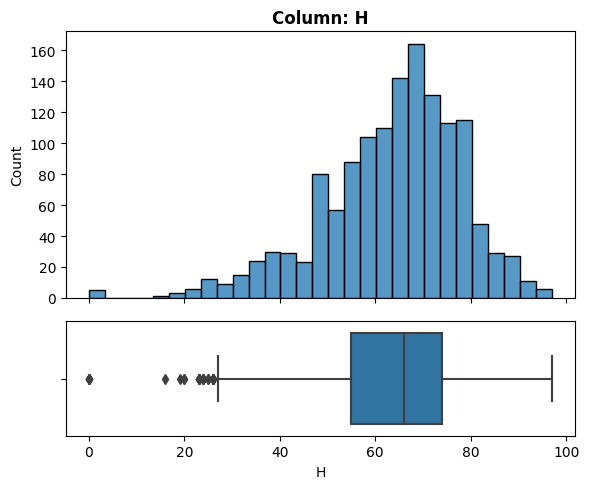

 - NaN's Found: 0 (0.0%)
- Unique Values: 77
- Most common value: '66' occurs 58 times (4.2%)
- Not constant or quasi-constant.


In [72]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Precipitation

In [73]:
#Descriptive statistics for Item MRP
df["PP"].describe()

count    1382.000000
mean        0.218090
std         1.306923
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.030000
Name: PP, dtype: float64

In [74]:
# Confirming the dtype to select correct EDA function
feature = "PP"
df[feature].dtype

dtype('float64')

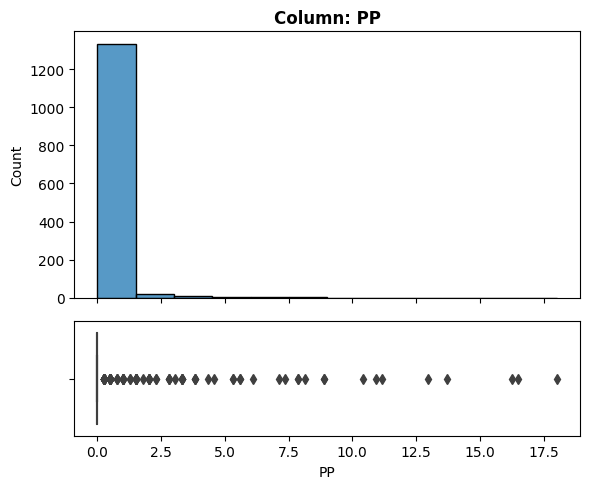

 - NaN's Found: 0 (0.0%)
- Unique Values: 32
- Most common value: '0.0' occurs 1273 times (92.11%)
- Not constant or quasi-constant.


In [75]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Total Rainfall

In [77]:
#Descriptive statistics for Item MRP
df["VV"].describe()

count    1382.000000
mean        9.101592
std        16.322905
min         0.000000
25%         8.400000
50%        10.000000
75%        10.000000
max       512.000000
Name: VV, dtype: float64

In [78]:
# Confirming the dtype to select correct EDA function
feature = "VV"
df[feature].dtype

dtype('float64')

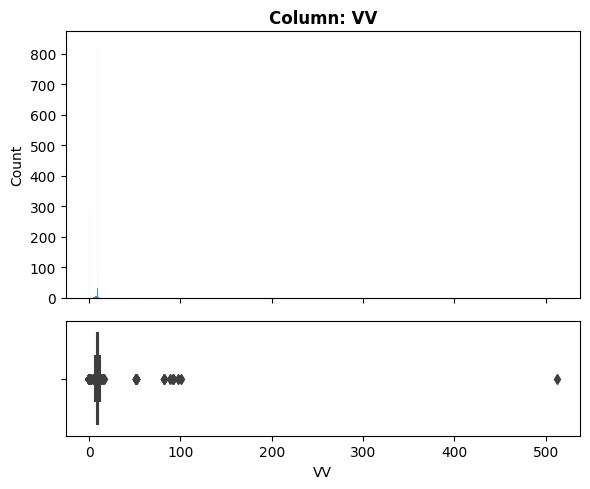

 - NaN's Found: 0 (0.0%)
- Unique Values: 56
- Most common value: '10.0' occurs 756 times (54.7%)
- Not constant or quasi-constant.


In [79]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Average Visibility

In [80]:
#Descriptive statistics for Item MRP
df["V"].describe()

count    1382.000000
mean       19.482706
std         7.136868
min         0.000000
25%        14.400000
50%        18.100000
75%        23.300000
max        49.100000
Name: V, dtype: float64

In [81]:
# Confirming the dtype to select correct EDA function
feature = "V"
df[feature].dtype

dtype('float64')

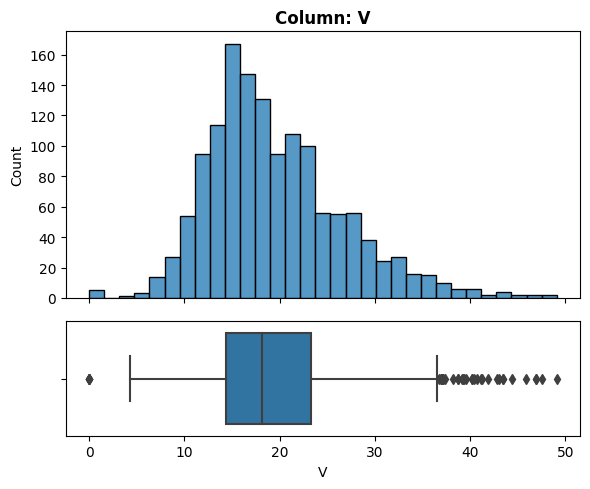

 - NaN's Found: 0 (0.0%)
- Unique Values: 198
- Most common value: '15.4' occurs 24 times (1.74%)
- Not constant or quasi-constant.


In [82]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Average Wind Speed

In [84]:
#Descriptive statistics for Item MRP
df["VM"].describe()

count    1382.000000
mean       35.381259
std        11.626362
min         0.000000
25%        27.800000
50%        33.500000
75%        42.400000
max        83.500000
Name: VM, dtype: float64

In [85]:
# Confirming the dtype to select correct EDA function
feature = "VM"
df[feature].dtype

dtype('float64')

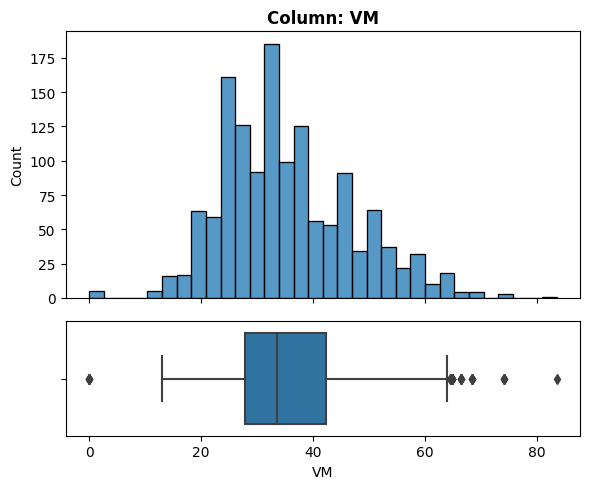

 - NaN's Found: 0 (0.0%)
- Unique Values: 49
- Most common value: '27.8' occurs 122 times (8.83%)
- Not constant or quasi-constant.


In [86]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Maximum Wind Speed

In [87]:
#Descriptive statistics for Item MRP
df["VG"].describe()

count    1382.000000
mean       29.184009
std        31.366315
min         0.000000
25%         0.000000
50%         0.000000
75%        57.600000
max       107.600000
Name: VG, dtype: float64

In [88]:
# Confirming the dtype to select correct EDA function
feature = "VG"
df[feature].dtype

dtype('float64')

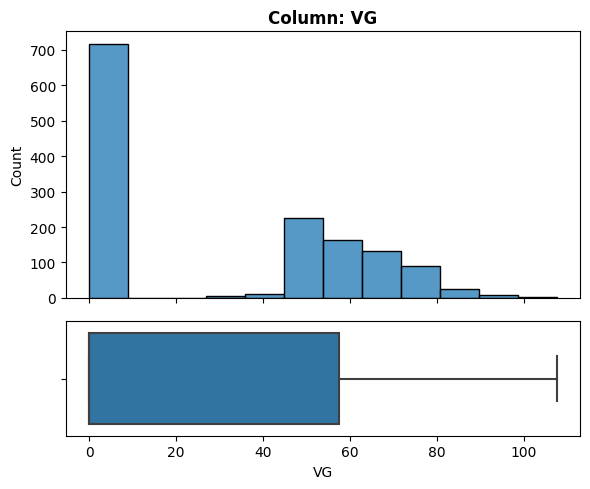

 - NaN's Found: 0 (0.0%)
- Unique Values: 48
- Most common value: '0.0' occurs 716 times (51.81%)
- Not constant or quasi-constant.


In [89]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Year

In [91]:
#Descriptive statistics for Item MRP
df["year"].describe()

count    1382.000000
mean     2016.258321
std         1.583491
min      2014.000000
25%      2015.000000
50%      2016.000000
75%      2018.000000
max      2019.000000
Name: year, dtype: float64

In [92]:
# Confirming the dtype to select correct EDA function
feature = "year"
df[feature].dtype

dtype('int64')

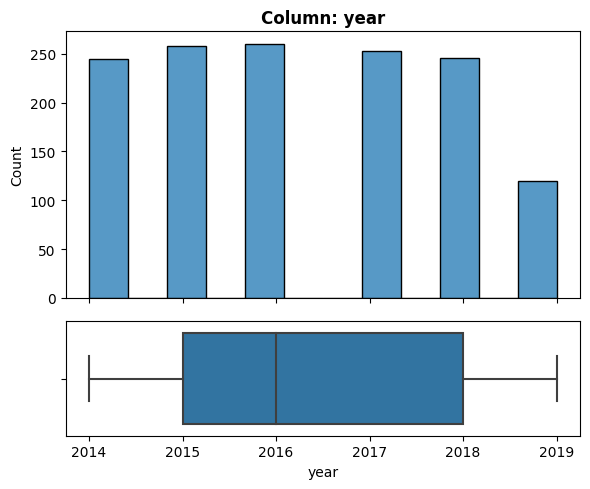

 - NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: '2016' occurs 260 times (18.81%)
- Not constant or quasi-constant.


In [93]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Month

In [94]:
#Descriptive statistics for Item MRP
df["month"].describe()

count    1382.000000
mean        6.184515
std         3.410588
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: month, dtype: float64

In [95]:
# Confirming the dtype to select correct EDA function
feature = "month"
df[feature].dtype

dtype('int64')

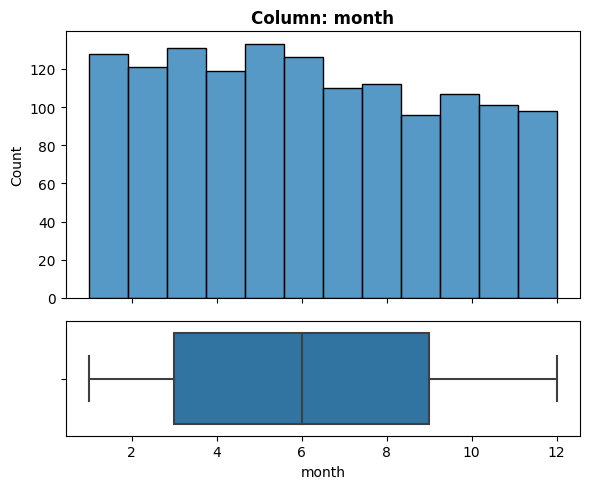

 - NaN's Found: 0 (0.0%)
- Unique Values: 12
- Most common value: '5' occurs 133 times (9.62%)
- Not constant or quasi-constant.


In [96]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Day

In [97]:
#Descriptive statistics for Item MRP
df["day"].describe()

count    1382.000000
mean       15.584660
std         8.741422
min         1.000000
25%         8.000000
50%        15.000000
75%        23.000000
max        31.000000
Name: day, dtype: float64

In [98]:
# Confirming the dtype to select correct EDA function
feature = "day"
df[feature].dtype

dtype('int64')

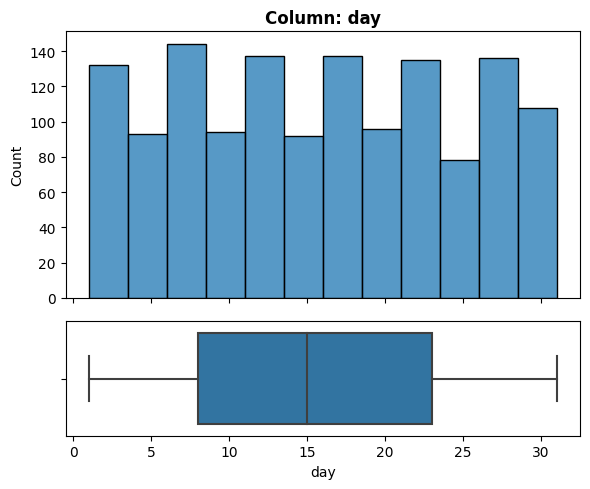

 - NaN's Found: 0 (0.0%)
- Unique Values: 31
- Most common value: '19' occurs 49 times (3.55%)
- Not constant or quasi-constant.


In [99]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

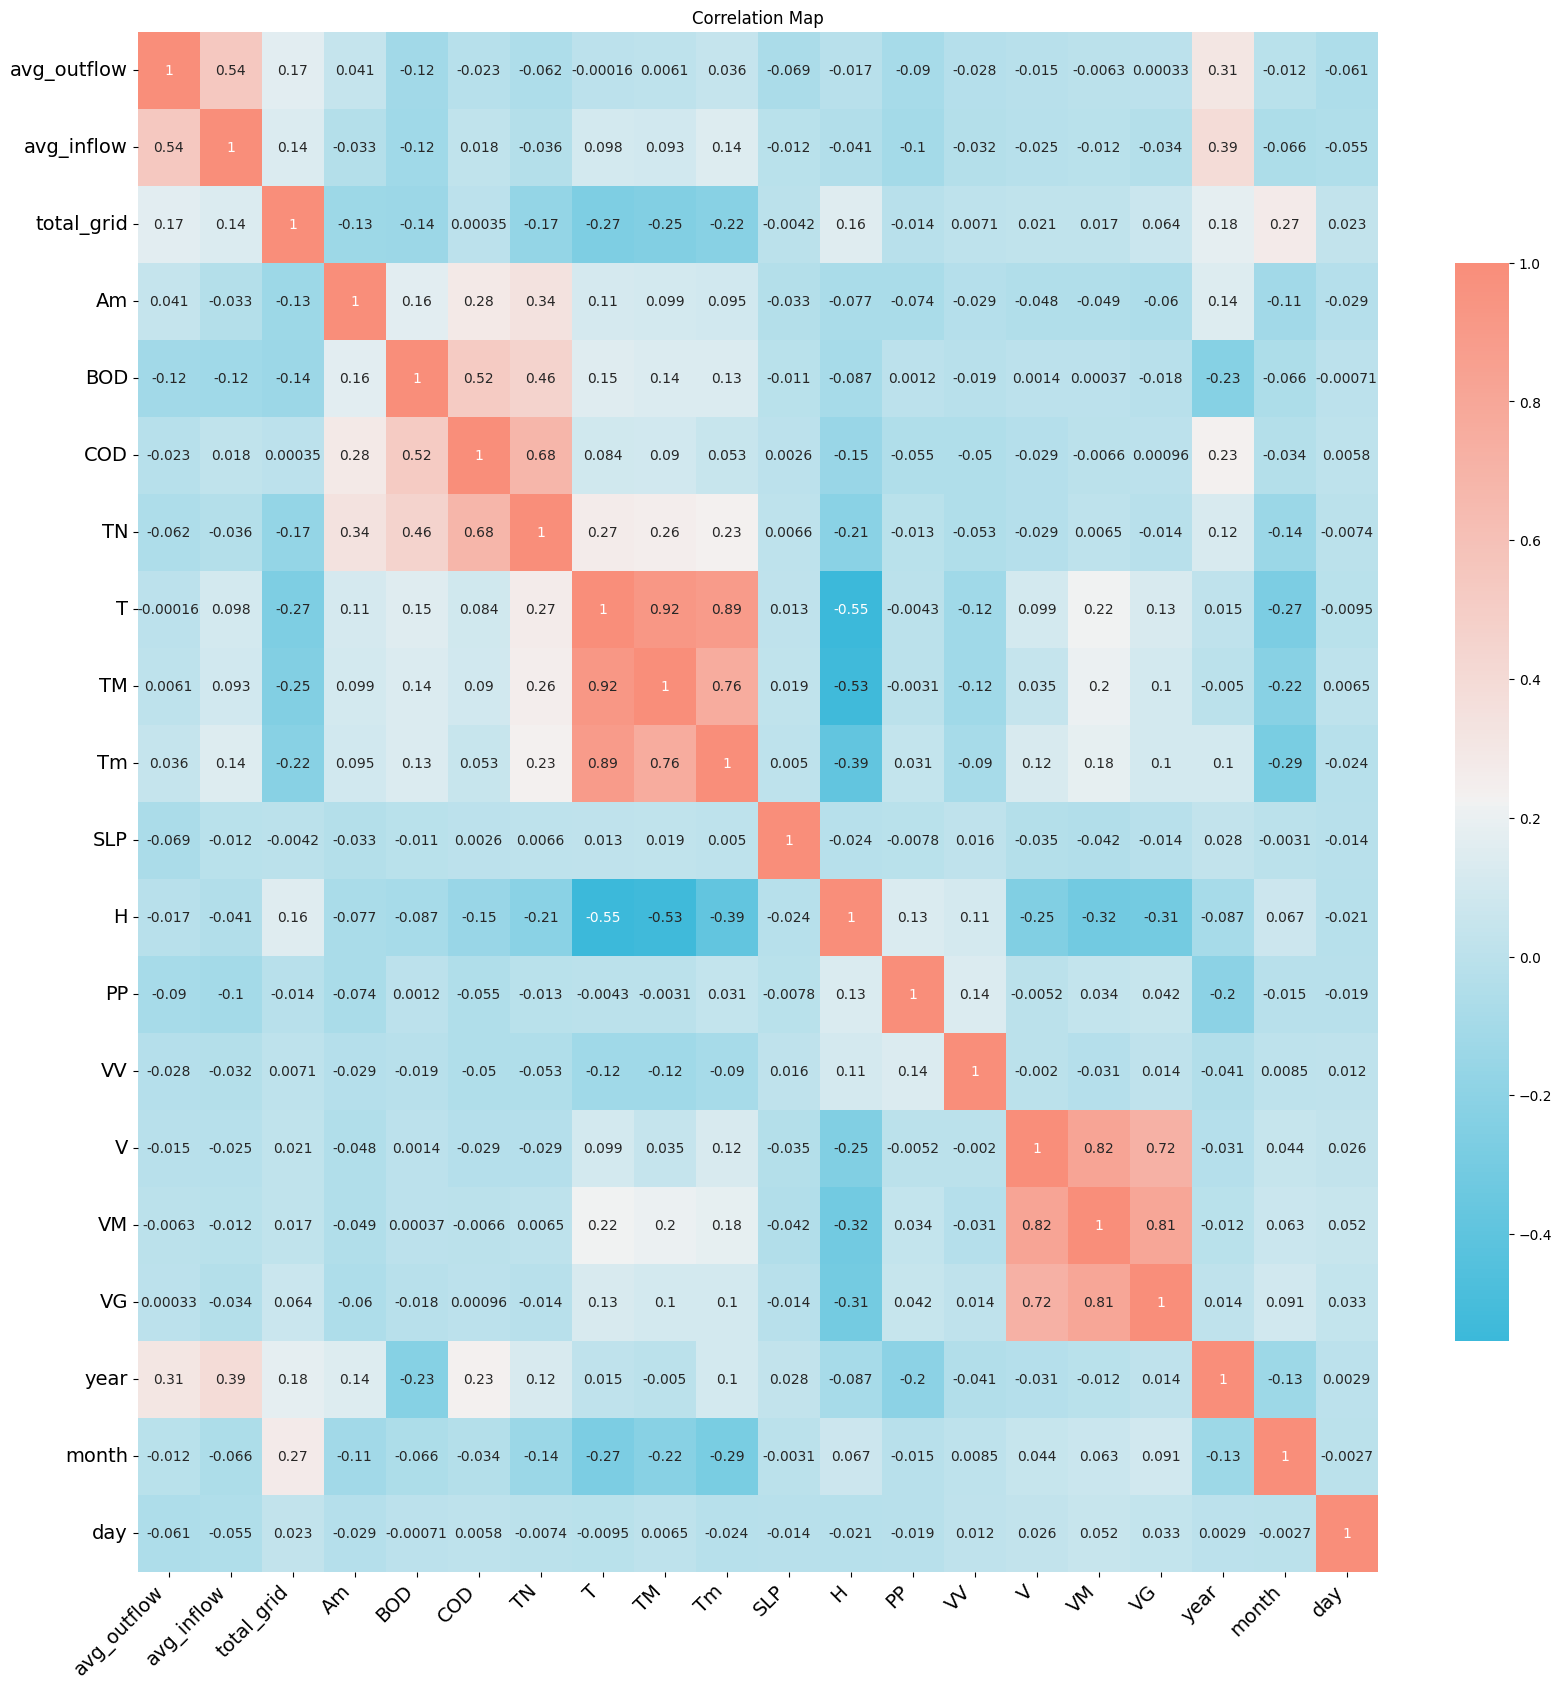

In [110]:
# Create a three-color gradient palette using diverging_palette()
custom_palette = sns.diverging_palette(220, 20, n=7, as_cmap=True, center='light', s=90, l=70, sep=1)

# Generate your dataframe (df) and calculate correlations
# Assuming you have already defined your 'df'

# Viewing heatmap to explore possible correlations
plt.figure(figsize=(20, 20))
ax = sns.heatmap(df.corr(), annot=True, cmap=custom_palette, linewidths=0, cbar_kws={'shrink': 0.7})
# Increase font size for x and y axis labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_title("Correlation Map");